124.01608010287747
     Power  Scan Speed       H_star
0     50.0    0.100000    39.654111
1     50.0    0.252632  1496.571730
2     50.0    0.405263  2997.182922
3     50.0    0.557895  4050.810434
4     50.0    0.710526  4829.534666
..     ...         ...          ...
395  400.0    2.389474  6974.460016
396  400.0    2.542105  6000.280978
397  400.0    2.694737  5174.135521
398  400.0    2.847368  4469.227614
399  400.0    3.000000  3864.590260

[400 rows x 3 columns]


/tmp/ipykernel_985/4183648161.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({'Power': power, 'Scan Speed': scan_speed, 'H_star': reward}, ignore_index=True)


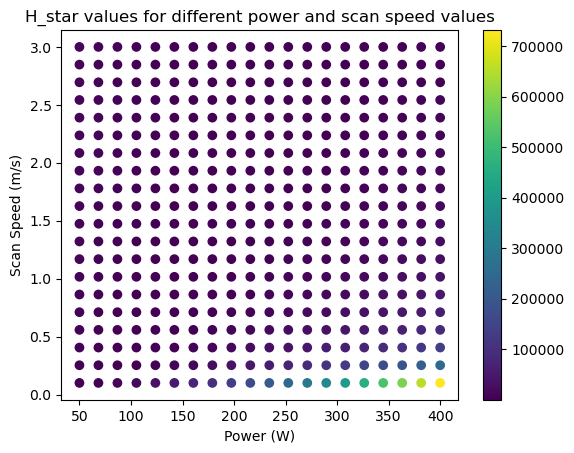

In [38]:
import numpy as np
import math
import pandas as pd
# input material properties

# calcualte alpha

# calcualte teh melt pool depth

# return pi1, pi2 

# heat of fusion for alu is 10.79 kJ/mol ???
# or 4*10^5 J/kg

# t0 will be 300K
# t_solid will be 580 + 273 K = 853 K

# rho = 2700 kg/m^3

# Cp = 0.915 kJ/kgK

# diffusivity = 9.7 * 10^-5 m^2/s

# lets take the absorptivity as 0.3 the same as in the paper
# assume that lasre power is at least 100W set the absorbptivity to 0.4 accoridn to the material paper


# we have: 
# maybe absorptivity, power, rho, cp, T_solid, T_0, hf, Diffusivity, scan_speed, beam_diameter

# ask abou the beam diameter, absorptivity

# we dont have:
# 


def H_star(absorptivity=0.3, power=400.0, rho=2500.0, Cp=915.0, T_solid=853.0, T_0=300.0, hf=40000.0, Diffusivity=0.000097, scan_speed=0.5, beam_diameter=0.0001):

    H = (4 * absorptivity * power * 0.3 * 0.9 * 100)/(np.pi*rho*(Cp*(T_solid - T_0) + hf) * np.sqrt(Diffusivity * scan_speed * beam_diameter**3))

    #write the values for the variables in a csv file 
        

    return H

test_1 = H_star(power=280, scan_speed=3)

print(test_1)



# write a loop to go through power bewtween 50 and 400W, scan speed between 0.750 and 3.0

#H * fourier number * absorptivity

df = pd.DataFrame(columns=['Power', 'Scan Speed', 'H_star'])

for power in np.linspace(50, 400, 20):
    for scan_speed in np.linspace(0.1, 3.0, 20):
        H_star_val = H_star(power=power, scan_speed=scan_speed)
        #*100*0.9*0.3
        #reward = (-0.01*(H_star_val - 125)**2) - 1000*((scan_speed - 3)**2) - 0.1*(power - 300)**2
        reward = ((H_star_val - 115)**2)# - 1000*((scan_speed - 3)**2) - 0.1*(power - 300)**2
        #reward = H_star_val
        df = df._append({'Power': power, 'Scan Speed': scan_speed, 'H_star': reward}, ignore_index=True)

print(df)

# write all the values for the variables in a csv file
df.to_csv('H_star_values.csv')

# plot the data
#use the H_star values as the color map

import matplotlib.pyplot as plt

plt.scatter(df['Power'], df['Scan Speed'], c=df['H_star'])
plt.colorbar()
plt.xlabel('Power (W)')
plt.ylabel('Scan Speed (m/s)')
plt.title('H_star values for different power and scan speed values')

        

plt.show()


In [39]:
df.head()

,Power,Scan Speed,H_star
0,50.0,0.100000,39.654111
1,50.0,0.252632,1496.571730
2,50.0,0.405263,2997.182922
3,50.0,0.557895,4050.810434
4,50.0,0.710526,4829.534666


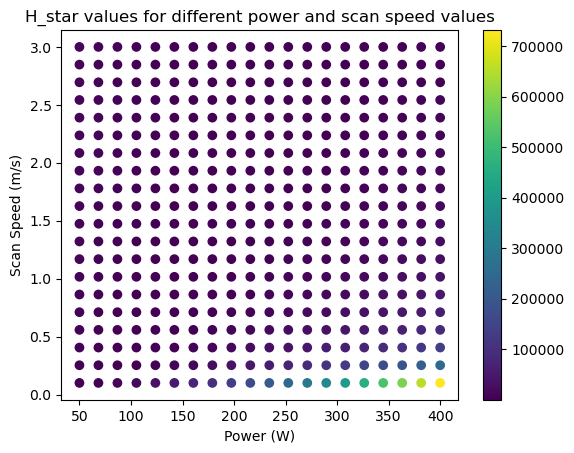

In [40]:
# plot the data
#use the H_star values as the color map

import matplotlib.pyplot as plt

plt.scatter(df['Power'], df['Scan Speed'], c=df['H_star'])
plt.colorbar()
plt.xlabel('Power (W)')
plt.ylabel('Scan Speed (m/s)')
plt.title('H_star values for different power and scan speed values')

        

plt.show()

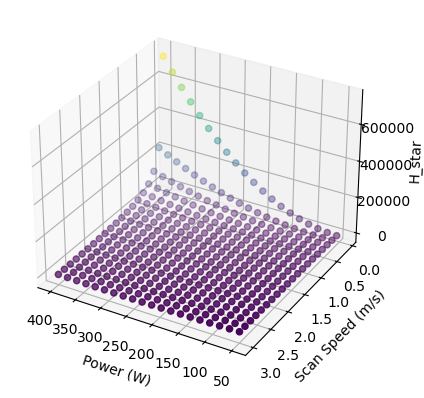

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Power'], df['Scan Speed'], df['H_star'], c=df['H_star'])
ax.set_xlabel('Power (W)')
ax.set_ylabel('Scan Speed (m/s)')
ax.set_zlabel('H_star')
ax.view_init(30, 120)
plt.show()




In [42]:
# fourier number for our aluminum
def Fourier(alpha=0.0000097, t=0.001, L=0.001):
    return alpha*t/L**2


SF = np.sqrt(Fourier())

print(SF)

0.09848857801796106


In [43]:
# def D_Depth(H):
#     a = 0.0152
#     b = -0.117
#     c = 1.215
#     # quadratic equation from the enthalpy paper
#     D = a*H**2 + b*H + c
#     return D


# def D_Width(H):
#     a = 0.00053
#     b = 0.158
#     c = 0.207
#     # quadratic equation from the enthalpy paper
#     W = a*H**2 + b*H + c
#     return W


In [44]:
# def Melt_mode(H):
#     Melt_mode = D_Depth(H) / D_Width(H)
#     #print(D_Depth(H), D_Width(H), Melt_mode)
#     if Melt_mode > 1:
#         #print("possible keyholes")
#         MM = 1
#     else:
#         #print("no keyholes")
#         MM = 0
#     return MM

In [45]:
# for i in range(50):
#     print(f"i={i}")
#     print(Melt_mode(i))


In [46]:
power = np.linspace(50, 400, 20)
scan_speed = np.linspace(0.1, 3.0, 20)




In [47]:
# read_depth = 0.00001*D_Depth(18)
# print(read_depth)

In [48]:
# H * 10 to get melt pool in micro meters


In [49]:
# reward function
H = H_star()
Scan_speed = 0.5
reward = (-0.01*(H - 150)**2) - 100*((scan_speed - 3)**4)
print(reward)

[-7879.17621128 -6503.646792   -5339.23630904 -4363.15042994
 -3553.89735553 -2891.28781992 -2356.43509051 -1931.75496796
 -1600.96578625 -1349.08841261 -1162.44624757 -1028.66522494
  -936.67381182  -876.70300857  -840.28634886  -820.25989963
  -810.76226111  -807.2345668   -806.4204835   -806.36621128]


100%|██████████| 100000/100000 [00:02<00:00, 34947.54it/s]


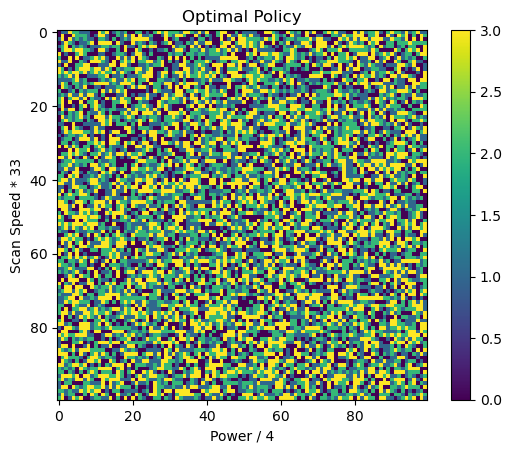

0.0


In [50]:
# q learning, table based

# state space: power, scan speed

# action space: power up, power down, power same, scan speed up, scan speed down, scan speed same

# H = (4 * self.absorptivity * power) * 100 * 0.9 * 0.3 / (np.pi * self.rho * (self.Cp * (self.T_solid - self.T_0) + self.hf) * np.sqrt(self.Diffusivity * scan_speed * self.beam_diameter**3))

# reward function = -0.01*(H_star(power, scan_speed) - 150)**2 - 100*((scan_speed - 3)**4)

# power range  = np.linsapce(50, 400, 100)

# scan speed range  = np.linsapce(0.2, 3.0, 100)

# explore the state space and action space

# start with a random state, random action

# update the q table

# repeat the process

# until the q table converges

# use the q table to find the optimal power and scan speed values

# plot the optimal power and scan speed values

# plot the H_star values for the optimal power and scan speed values

# intruduce a chance to pick a random action instead of the optimal action

# max epochs = 1000


import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


class QLearning:
    def __init__(self):
        self.alpha = 0.1
        self.gamma = 0.6
        self.epsilon = 0.1
        self.q_table = np.zeros((100, 100, 4))
        self.power_range = np.linspace(50.0, 400.0, 100)
        self.scan_speed_range = np.linspace(2.0, 20.0, 100)
        self.epochs = 100000
        self.absorptivity = 0.3
        self.rho = 2500.0
        self.Cp = 915.0
        self.T_solid = 853.0
        self.T_0 = 300.0
        self.hf = 40000.0
        self.Diffusivity = 0.000097
        self.beam_diameter = 0.0001
        self.start_reward = -1
        self.lr = 0.1

    def H_star(self, power, scan_speed):
        H = ((4 * self.absorptivity * power ) / (np.pi * self.rho * (self.Cp * (self.T_solid - self.T_0) + self.hf) * np.sqrt(self.Diffusivity * (scan_speed/10) * self.beam_diameter**3)))
        return H
    
    def reward(self, power, scan_speed):
                # reward = (-0.01*(H_star(power, scan_speed) - 150)**2) - 1000*((scan_speed - 3)**2) - 0.1*(power - 300)**2
        reward = (-0.01*(H_star(power, scan_speed/10) - 150)**2) - 1000*((scan_speed/10 - 3)**2) - 0.1*(power - 300)**2
        #print(power, scan_speed, reward)
        return reward
    
    def get_state(self, power, scan_speed):
        power_index = np.argmin(np.abs(self.power_range - power))
        scan_speed_index = np.argmin(np.abs(self.scan_speed_range - scan_speed))
        return power_index, scan_speed_index
    
    def get_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(4)
            #print(action)
        else:
            action = np.argmax(self.q_table[state])
        return action
    
    def update_q_table(self, state, action, reward, next_state):
        predict = self.q_table[state][action]
        target = reward + self.gamma * np.max(self.q_table[next_state])
        self.q_table[state][action] += self.alpha * (target - predict)

    def train(self):
        #reward = self.start_reward
        for epoch in tqdm(range(self.epochs)):
            power = np.random.choice(self.power_range)
            scan_speed = np.random.choice(self.scan_speed_range)
            state = self.get_state(power, scan_speed)
            action = self.get_action(state)
            reward = self.reward(power, scan_speed)
            if power < 50 or scan_speed < 0.2:
                reward = -100000
            if action == 0:
                power = min(power + 1, self.power_range[-1])
            elif action == 1:
                power = max(power - 1, self.power_range[0])
            elif action == 2:
                scan_speed = min(scan_speed + 0.1, self.scan_speed_range[-1])
            elif action == 3:
                scan_speed = max(scan_speed - 0.1, self.scan_speed_range[0])
            next_state = self.get_state(power, scan_speed)
            self.update_q_table(state, action, reward, next_state)

        return self.q_table
    
    def optimal_policy(self):
        optimal_policy = np.zeros((100, 100))
        for i in range(100):
            for j in range(100):
                optimal_policy[i][j] = np.argmax(self.q_table[i][j])
        return optimal_policy
    
    def plot_optimal_policy(self):
        optimal_policy = self.optimal_policy()
        plt.imshow(optimal_policy)
        plt.colorbar()
        plt.xlabel('Power / 4')
        plt.ylabel('Scan Speed * 33')
        plt.title('Optimal Policy')
        plt.show()

ql = QLearning()
q_table = ql.train()
ql.plot_optimal_policy()

# print the values assossiated with the highest reward
print(np.max(q_table))





In [51]:
# # print the values assossiated with the highest reward
# print(np.max(q_table))

# # print the power and scan speed values assossiated with the highest reward
# print(np.argmax(q_table))
q_copy = q_table.copy()

# print the location of the highest reward
recc_power, recc_ss, R = np.unravel_index(np.argmax(q_copy, axis=None), q_copy.shape)
print(f"The recommended power is {recc_power*4} and the recommended scan speed is {int(recc_ss/33)}")
# now print the location of the second highest reward
q_copy[recc_power, recc_ss] = -100000
recc_power, recc_ss, R = np.unravel_index(np.argmax(q_copy, axis=None), q_copy.shape)
print(f"The second recommended power is {recc_power*4} and the second recommended scan speed is {int(recc_ss/33)}")
# now print the location of the third highest reward
q_copy[recc_power, recc_ss] = -100000
recc_power, recc_ss, R = np.unravel_index(np.argmax(q_copy, axis=None), q_copy.shape)
print(f"The third recommended power is {recc_power*4} and the third recommended scan speed is {int(recc_ss/33)}")





The recommended power is 0 and the recommended scan speed is 2
The second recommended power is 8 and the second recommended scan speed is 2
The third recommended power is 12 and the third recommended scan speed is 0


In [52]:
print(q_table.shape)

(100, 100, 4)
